In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
n_cls = 20   # Number of samples in each class.
 
np.random.seed(1)  # for reproducibility

# specify mean and std deviation for each class
x11 = np.random.normal(0.5, 1, (n_cls, 1))
np.random.seed(2)  # for reproducibility
x12 = np.random.normal(0.4, 1, (n_cls, 1))
np.random.seed(3)  # for reproducibility
x21 = np.random.normal(-0.3, 1, (n_cls, 1))
np.random.seed(4)  # for reproducibility
x22 = np.random.normal(-0.5, 1, (n_cls, 1))
 
X = np.vstack((
  np.hstack((x11, x12)),
  np.hstack((x21, x22))
))
y = np.hstack((-1 * np.ones(n_cls), +1 * np.ones(n_cls)))

clf = svm.SVC(kernel='linear', C=1000, random_state=1, probability=True)
clf.fit(X, y)


SVC(C=1000, kernel='linear', probability=True, random_state=1)

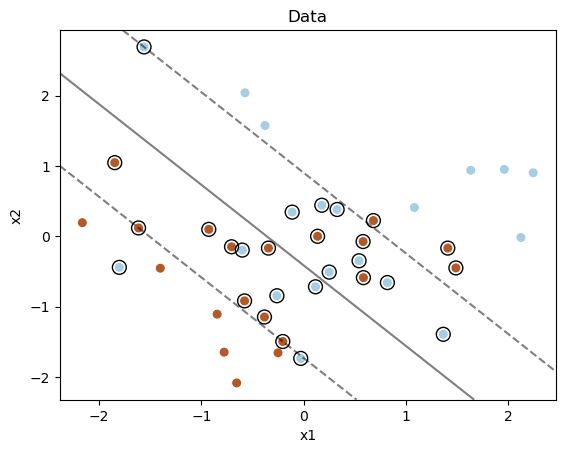

In [3]:
fig = plt.figure(1)
plt.clf()
 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
 
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

[[0.62901122 0.37098878]
 [0.26314804 0.73685196]]


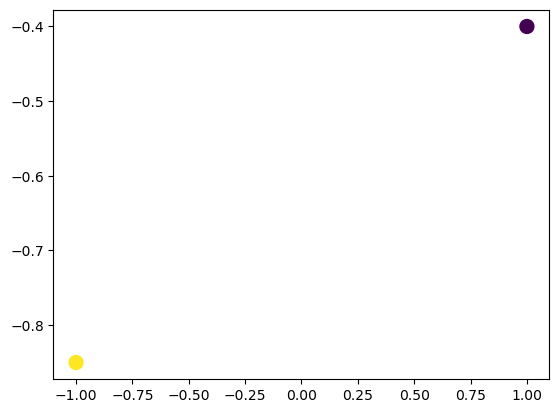

In [4]:
X_new = np.array([
    [1, -0.4],
    [-1, -0.85],
    ])
 
y_new = clf.predict(X_new)
 
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=100)
fig.canvas.draw()
fig.canvas.flush_events()

# Get posterior probabilities for predictions (requires SVC to be created with
#   `probability=True`).
post_probs = clf.predict_proba(X_new)
print(post_probs)

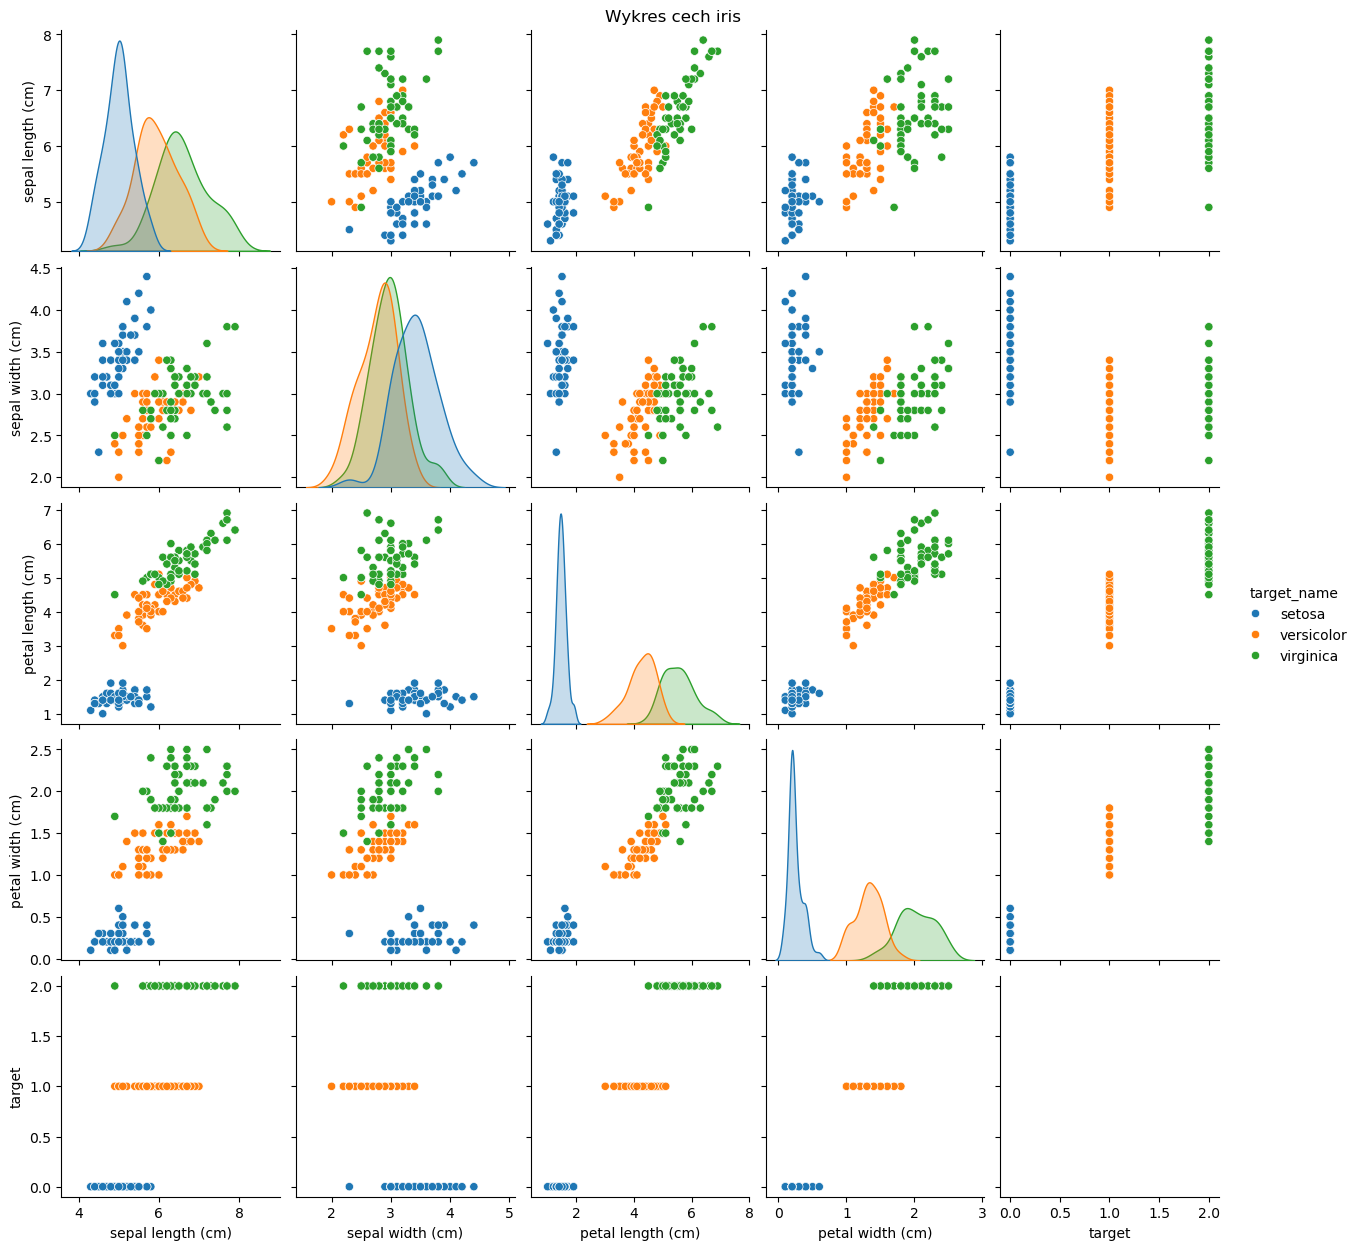

In [3]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target 

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda i: iris.target_names[i])

sns.pairplot(df, hue='target_name')
plt.suptitle("Wykres cech iris", y=1)
plt.show()


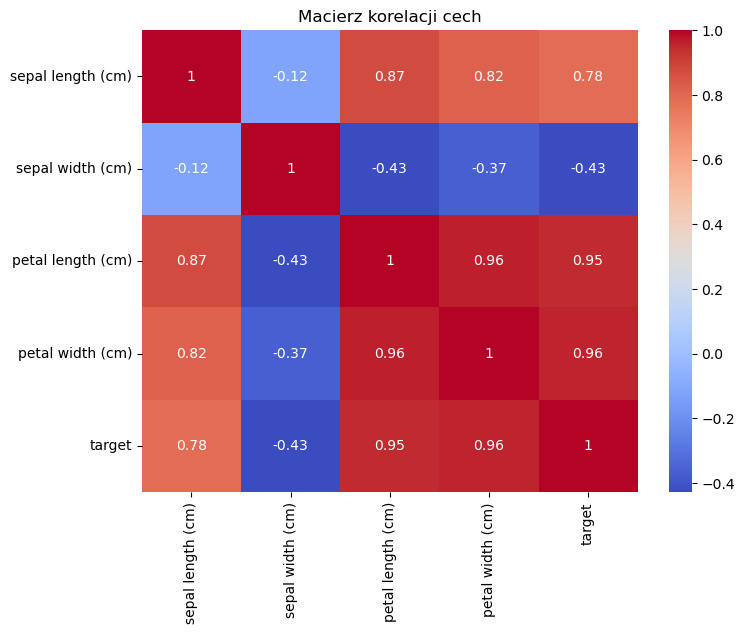

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Macierz korelacji cech")
plt.show()


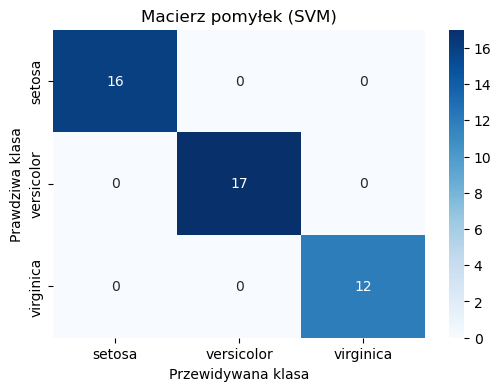

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

clf = svm.SVC(kernel='linear', C=1.0, probability=True, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Przewidywana klasa")
plt.ylabel("Prawdziwa klasa")
plt.title("Macierz pomyłek (SVM)")
plt.show()


In [8]:
report_dict = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
report_df = pd.DataFrame(report_dict).T
report_df = report_df.rename(columns={
    'precision': 'precyzja',
    'recall': 'czułość',
    'f1-score': 'f1',
    'support': 'liczba próbek'
})
print("=== Raport klasyfikacji ===")
print(report_df.round(2))


=== Raport klasyfikacji ===
              precyzja  czułość   f1  liczba próbek
setosa             1.0      1.0  1.0           16.0
versicolor         1.0      1.0  1.0           17.0
virginica          1.0      1.0  1.0           12.0
accuracy           1.0      1.0  1.0            1.0
macro avg          1.0      1.0  1.0           45.0
weighted avg       1.0      1.0  1.0           45.0


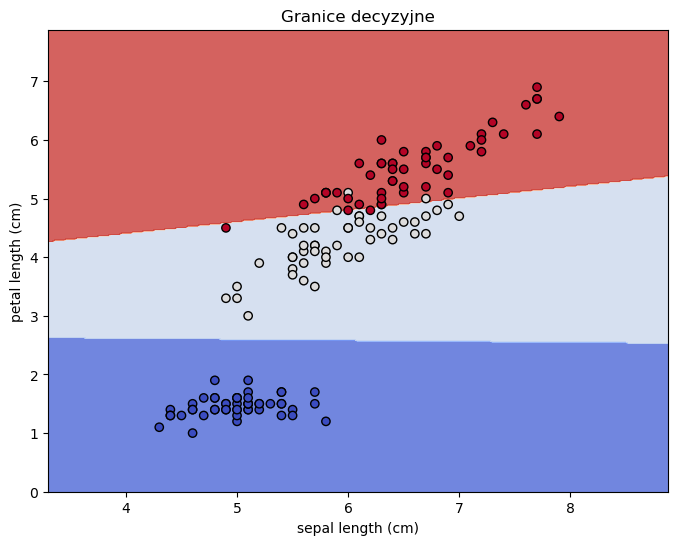

In [9]:
def plot_decision_boundary(clf, X, y, feature_indices=(0, 2), title="Granice decyzyjne"):
    X_plot = X[:, feature_indices]
    y_plot = y
    h = .02
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    clf.fit(X_plot, y_plot)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(iris.feature_names[feature_indices[0]])
    plt.ylabel(iris.feature_names[feature_indices[1]])
    plt.title(title)
    plt.show()

plot_decision_boundary(svm.SVC(kernel='linear', C=1.0), X, y, feature_indices=(0, 2))


In [10]:
X_new = np.array([
    [5.1, 3.5, 1.4, 0.2],  # typowa setosa
    [6.7, 3.0, 5.2, 2.3],  # typowa virginica
])
y_new = clf.predict(X_new)
print("Nowe próbki sklasyfikowano jako:", [iris.target_names[i] for i in y_new])

post_probs = clf.predict_proba(X_new)
print("\nPrawdopodobieństwa :\n", post_probs)


Nowe próbki sklasyfikowano jako: ['setosa', 'virginica']

Prawdopodobieństwa :
 [[0.96581386 0.02256576 0.01162038]
 [0.01299487 0.03293637 0.95406877]]
